# Example of use of the dataset for wear classification

In [2]:
# Import Lib
from utils_punchdataset import loader
import pandas as pd
import numpy as np
import pycaret
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
import cv2

## Load dataset

In [ ]:
base_path="punch_dataset"

In [ ]:
path = os.path.join("punch_dataset","LookUp.csv")
data=loader.punch_data(path)

In [5]:
data.data.head()

,Stroke,Thickness,Sensors,Image,Labels
0,5852,500.768070,Sensors\5852.csv,Images\5852.jpg,initial_wear
1,5865,501.223980,Sensors\5865.csv,Images\5865.jpg,initial_wear
2,5878,500.560970,Sensors\5878.csv,Images\5878.jpg,initial_wear
3,5893,500.881175,Sensors\5893.csv,Images\5893.jpg,initial_wear
4,5904,500.702215,Sensors\5904.csv,Images\5904.jpg,initial_wear


## Preprocessing of data (PCA)

### PCA Images

In [6]:
img=[]
for impath in data.data['Image']:
    #print(base_path,impath.replace('Images\\','Images/'))
    im = cv2.imread(os.path.join(base_path,impath.replace('Images\\','Images/')),0)
    d = cv2.resize(im, (256,256))
    img.append((d/255).flatten())
    

In [7]:
#IM gonna be data
pca_test_im = PCA(n_components=2500)  #
pca_test_im.fit(np.nan_to_num(img))
pca_sum_im = np.cumsum(pca_test_im.explained_variance_ratio_)
index_99_im = pca_sum_im < 0.90
val_im, counts_im = np.unique(index_99_im,return_counts=True)
pca_im = PCA(n_components=counts_im[1])

In [8]:
test=normalize(np.nan_to_num(img))
test

array([[0.00135096, 0.00135096, 0.00130093, ..., 0.00050036, 0.00050036,
        0.00050036],
       [0.00143   , 0.00143   , 0.00143   , ..., 0.00047667, 0.00047667,
        0.00047667],
       [0.00125544, 0.00125544, 0.00120894, ..., 0.00051148, 0.00046498,
        0.00046498],
       ...,
       [0.00023095, 0.        , 0.00023095, ..., 0.00138568, 0.00161663,
        0.00161663],
       [0.00023622, 0.        , 0.00023622, ..., 0.00188977, 0.00212599,
        0.00188977],
       [0.00022507, 0.        , 0.00045015, ..., 0.00157552, 0.00180059,
        0.00180059]])

In [ ]:
data_im=pca_im.fit_transform(test)


In [ ]:
data_im

In [18]:
columns_im = [('imPCA_' + str(x)) for x in range(0, data_im.shape[1])]

In [19]:
pdImg = pd.DataFrame(data_im, columns=columns_im)
pdImg.head()

,imPCA_0,imPCA_1,imPCA_2,imPCA_3,imPCA_4,imPCA_5,imPCA_6,imPCA_7,imPCA_8,imPCA_9,...,imPCA_2266,imPCA_2267,imPCA_2268,imPCA_2269,imPCA_2270,imPCA_2271,imPCA_2272,imPCA_2273,imPCA_2274,imPCA_2275
0,-0.004488,-0.197561,-0.061269,0.129900,0.107365,0.109984,0.091244,0.020775,-0.134203,-0.042722,...,0.001488,0.003539,-0.001577,-0.005158,0.002352,0.004174,0.000234,0.001359,0.000005,0.002959
1,-0.018273,-0.198504,-0.067554,0.120019,0.091014,0.092018,0.056772,0.013780,-0.118825,-0.051497,...,0.000280,0.000651,0.002135,-0.000696,-0.003060,-0.002582,0.001895,-0.000254,-0.002940,-0.000384
2,0.038460,-0.212005,-0.083844,0.130644,0.104344,0.077435,0.045894,0.017238,-0.101193,-0.068388,...,-0.000337,0.002746,-0.002542,-0.000460,0.005046,0.005675,-0.000746,-0.002594,0.001785,0.000983
3,0.010236,-0.202251,-0.074174,0.128452,0.120660,0.083399,0.067984,0.015373,-0.115707,-0.060309,...,0.001255,0.001253,0.000692,-0.000191,-0.000132,0.003579,-0.001146,-0.001287,0.002096,-0.000001
4,-0.008875,-0.197755,-0.077624,0.146661,0.097020,0.096429,0.086367,0.025290,-0.133745,-0.039472,...,0.004080,0.002141,-0.002423,0.000676,-0.001271,0.001801,0.003166,0.002827,0.001779,0.000991


### PCA Force

In [27]:
force=[]
for senspath in data.data['Sensors']:
    i_forces= pd.read_csv((os.path.join(base_path,senspath.replace('Sensors\\','Sensors/'))))
    i_forces.head()
    force.append(i_forces['Force'])

In [28]:
#f gonna be data
pca_test_f = PCA(n_components=500)  #
pca_test_f.fit(np.nan_to_num(force))
pca_sum_f = np.cumsum(pca_test_f.explained_variance_ratio_)
index_99_f = pca_sum_f < 0.99
val_f, counts_f = np.unique(index_99_f,return_counts=True)
pca_f = PCA(n_components=counts_f[1])

In [29]:
f = normalize(np.nan_to_num(force))
data_f=pca_f.fit_transform(f)

In [30]:
columns_f = [('fPCA_' + str(x)) for x in range(0, data_f.shape[1])]

In [32]:
pdF = pd.DataFrame(data_f, columns=columns_f)
pdF.head()

,fPCA_0,fPCA_1,fPCA_2,fPCA_3,fPCA_4,fPCA_5,fPCA_6,fPCA_7,fPCA_8,fPCA_9,...,fPCA_16,fPCA_17,fPCA_18,fPCA_19,fPCA_20,fPCA_21,fPCA_22,fPCA_23,fPCA_24,fPCA_25
0,0.184603,0.629790,0.373524,0.214614,-0.146901,0.030226,-0.376724,0.471526,0.066537,-0.158226,...,-0.116349,-0.041518,0.110097,0.271990,-0.117345,-0.099493,0.021930,-0.029183,0.031251,-0.040039
1,0.203187,0.665758,0.389588,0.214777,-0.143222,0.018169,-0.201402,0.564990,0.244993,-0.109642,...,-0.085618,-0.123973,0.173407,0.129830,-0.052308,0.016483,-0.009347,-0.065155,0.051788,-0.045765
2,0.244043,0.647861,0.385535,0.269270,-0.217961,-0.263483,-0.219047,0.186349,0.001758,-0.209248,...,0.071013,0.166369,-0.345131,-0.054152,-0.035516,0.066161,0.023252,-0.065156,-0.098942,0.160810
3,0.203597,0.651576,0.357480,0.227118,-0.153812,-0.023741,-0.489204,0.224821,-0.226683,-0.257466,...,-0.021155,0.044438,-0.167670,0.185668,-0.152644,-0.083013,0.034667,-0.061918,-0.060784,0.067605
4,0.165354,0.619990,0.323889,0.216597,-0.201766,-0.178328,-0.425957,-0.056400,-0.359247,-0.119421,...,0.162984,-0.107306,-0.102720,-0.233329,-0.028499,0.134430,-0.051484,0.013250,0.070628,0.018825


### PCA AE

In [33]:
ae=[]
for senspath in data.data['Sensors']:
    i_ae= pd.read_csv((os.path.join(base_path,senspath.replace('Sensors\\','Sensors/'))))
    ae.append(i_ae['AE'])

In [34]:
#ae gonna be data
pca_test_ae = PCA(n_components=2500)  #
pca_test_ae.fit(np.nan_to_num(ae))
pca_sum_ae = np.cumsum(pca_test_ae.explained_variance_ratio_)
index_99_ae = pca_sum_ae < 0.99
val_ae, counts_ae = np.unique(index_99_ae,return_counts=True)
pca_ae = PCA(n_components=counts_ae[1])

In [35]:
ae = normalize(np.nan_to_num(ae))
data_ae=pca_f.fit_transform(ae)

In [36]:
columns_ae = [('aePCA_' + str(x)) for x in range(0, data_f.shape[1])]

In [37]:
pdAE = pd.DataFrame(data_ae, columns=columns_ae)
pdAE.head()

,aePCA_0,aePCA_1,aePCA_2,aePCA_3,aePCA_4,aePCA_5,aePCA_6,aePCA_7,aePCA_8,aePCA_9,...,aePCA_16,aePCA_17,aePCA_18,aePCA_19,aePCA_20,aePCA_21,aePCA_22,aePCA_23,aePCA_24,aePCA_25
0,0.059860,-0.022071,0.067419,-0.074301,-0.019727,0.022104,-0.042484,0.006591,0.101314,-0.101051,...,-0.024678,-0.104478,0.006843,0.030487,-0.058742,-0.101914,-0.057115,-0.006829,0.058114,0.153763
1,-0.083650,-0.231947,-0.030343,0.012351,0.077977,0.127782,-0.208685,0.007305,0.187513,0.006926,...,0.038725,-0.016091,0.125134,-0.083372,-0.019522,-0.024756,-0.034957,-0.211659,0.017275,-0.179187
2,-0.246118,0.190439,-0.130686,-0.298001,-0.010013,0.128923,-0.086674,-0.046049,-0.051408,-0.172790,...,0.037782,-0.114449,-0.060626,-0.021204,-0.121933,-0.089786,0.021377,-0.055144,-0.078387,0.191354
3,0.152697,-0.063360,-0.050289,0.053467,0.193961,0.022562,-0.125800,-0.079151,-0.137425,0.110026,...,-0.027037,-0.225414,0.091549,0.059155,-0.000180,0.111154,0.086345,-0.145609,-0.126366,-0.099094
4,-0.070991,-0.012088,-0.139916,-0.215259,0.138467,0.038445,0.002847,-0.116849,0.159574,-0.065695,...,-0.129220,-0.131929,-0.034427,0.191699,-0.211754,0.061957,-0.050344,0.195305,-0.073240,0.149110


### Normalize Thickness

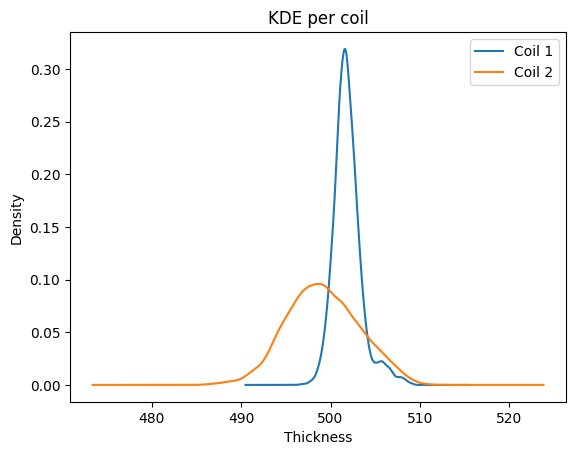

In [41]:
data.plot_kde_thickness(all=False,same=True)

In [49]:
from sklearn.preprocessing import StandardScaler
#####ENDE HIER
mask = data.data.Stroke < 78840
datacoil1 = data.data[mask]
mask = data.data.Stroke > 78840
datacoil2 = data.data[mask]
dickez1 = StandardScaler().fit_transform(datacoil1.Thickness.values.reshape(-1, 1))
dickez2 = StandardScaler().fit_transform(datacoil2.Thickness.values.reshape(-1, 1))
dickez = np.append(dickez1, dickez2)

pdThickness = pd.DataFrame(dickez, columns=['Thickness'])
pdThickness

,Thickness
0,-0.713241
1,-0.427972
2,-0.842826
3,-0.642470
4,-0.754447
...,...
11916,-1.634421
11917,-1.247385
11918,0.844310
11919,2.132090


### Join reduced DataFrame

In [53]:
pdData=pd.concat([pdThickness,pdImg,pdF,pdAE, data.data['Labels']], axis=1)
pdData

,Thickness,imPCA_0,imPCA_1,imPCA_2,imPCA_3,imPCA_4,imPCA_5,imPCA_6,imPCA_7,imPCA_8,...,aePCA_17,aePCA_18,aePCA_19,aePCA_20,aePCA_21,aePCA_22,aePCA_23,aePCA_24,aePCA_25,Labels
0,-0.713241,-0.004488,-0.197561,-0.061269,0.129900,0.107365,0.109984,0.091244,0.020775,-0.134203,...,-0.104478,0.006843,0.030487,-0.058742,-0.101914,-0.057115,-0.006829,0.058114,0.153763,initial_wear
1,-0.427972,-0.018273,-0.198504,-0.067554,0.120019,0.091014,0.092018,0.056772,0.013780,-0.118825,...,-0.016091,0.125134,-0.083372,-0.019522,-0.024756,-0.034957,-0.211659,0.017275,-0.179187,initial_wear
2,-0.842826,0.038460,-0.212005,-0.083844,0.130644,0.104344,0.077435,0.045894,0.017238,-0.101193,...,-0.114449,-0.060626,-0.021204,-0.121933,-0.089786,0.021377,-0.055144,-0.078387,0.191354,initial_wear
3,-0.642470,0.010236,-0.202251,-0.074174,0.128452,0.120660,0.083399,0.067984,0.015373,-0.115707,...,-0.225414,0.091549,0.059155,-0.000180,0.111154,0.086345,-0.145609,-0.126366,-0.099094,initial_wear
4,-0.754447,-0.008875,-0.197755,-0.077624,0.146661,0.097020,0.096429,0.086367,0.025290,-0.133745,...,-0.131929,-0.034427,0.191699,-0.211754,0.061957,-0.050344,0.195305,-0.073240,0.149110,initial_wear
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11916,-1.634421,-0.285714,0.554550,-0.036095,0.030653,-0.024926,0.063639,0.030260,-0.057035,0.016724,...,0.116364,-0.121051,0.017921,0.068603,0.039016,-0.089535,-0.171659,-0.117972,0.214617,failure
11917,-1.247385,-0.262816,0.560487,-0.032346,0.051144,0.011234,0.103108,0.058391,-0.094204,0.024679,...,-0.013702,0.065735,-0.079902,-0.083480,-0.004321,0.044600,0.051727,0.084644,0.005928,failure
11918,0.844310,-0.263749,0.577356,-0.039941,0.065206,-0.021135,0.082840,0.008276,-0.066523,0.039033,...,-0.078161,-0.187952,-0.052936,0.058295,-0.042915,0.116035,-0.093234,-0.037471,0.265171,failure
11919,2.132090,-0.237352,0.603674,-0.044318,0.032021,0.013681,0.073962,0.013267,-0.141989,0.032886,...,0.138434,-0.038105,0.181432,-0.078764,-0.005763,-0.013763,0.057225,-0.006390,0.128027,failure


## Show Label Distribution

In [ ]:
import matplotlib.pyplot as plt
counts=pdData['Labels'].value_counts()
counts.plot(kind="bar")
plt.tight_layout()
plt.show()

Imbalenced, therefore F1-Score.

## Start PyCaret Experiment

In [55]:
from pycaret.classification import *
from pycaret.classification import ClassificationExperiment
ex= ClassificationExperiment()
ex.setup(pdData, 
            target = "Labels",
            train_size = 0.8,
            fold = 5,
            session_id = 123,
            use_gpu = True,
            log_experiment=False,
            log_plots=False,
            ignore_features = ['Stroke'])

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,123
1,Target,Labels
2,Target type,Multiclass
3,Target mapping,"failure: 0, initial_wear: 1, normal: 2, wear: 3"
4,Original data shape,"(11921, 2330)"
5,Transformed data shape,"(11921, 2330)"
6,Transformed train set shape,"(9536, 2330)"
7,Transformed test set shape,"(2385, 2330)"
8,Ignore features,1
9,Numeric features,2329


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 3060, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [57]:
best = ex.compare_models(include=['svm','lr','knn'])

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:20:20
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
svm,SVM - Linear Kernel,0.9939,0.0000,0.9939,0.9940,0.9939,0.9903,0.9904,0.5720
lr,Logistic Regression,0.9912,0.9995,0.9912,0.9912,0.9912,0.9860,0.9861,1.5700
knn,K Neighbors Classifier,0.9888,0.9976,0.9888,0.9888,0.9888,0.9822,0.9822,1.1500


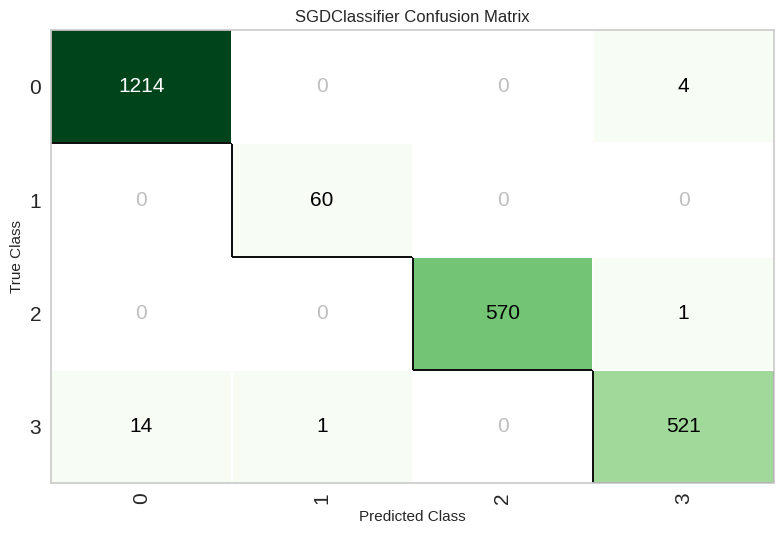

In [60]:
set_current_experiment(ex)
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [ ]:
set_current_experiment(ex)
# plot AUC
plot_model(best, plot = 'auc')

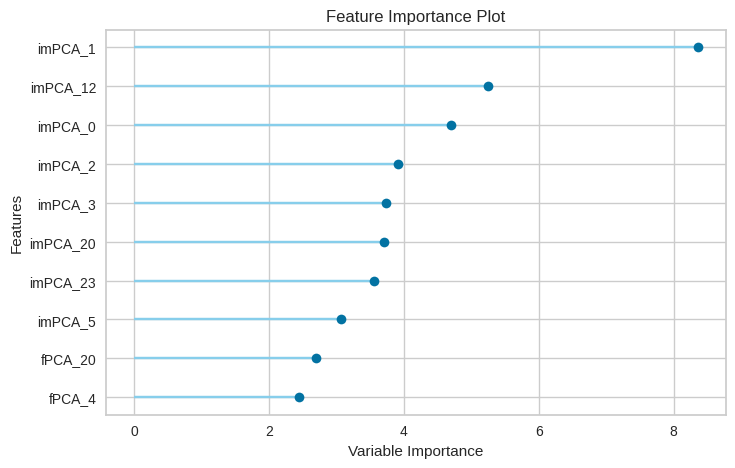

In [62]:
set_current_experiment(ex)
# plot feature importance
plot_model(best, plot = 'feature')

